### Simple Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Read data file 


In [2]:
def read_data(file):
    """Returns a np array from file. The resultant dimensions are N lines X variable size."""

    X = []
    y = []
    for line in file:
        spectra = [float(nmr) for nmr in line.split(", ")[:-1]]
        X.append(np.array(spectra))
        y.append(np.array(int(line.split(", ")[-1].strip())))

    X = np.array(X, dtype=object)
    y = np.array(y)

    return (X, y)

In [3]:
file = open("../train/data/alkaloids.csv")

In [4]:
X, y = read_data(file)

### We are gonna analize the NMR spectra corresponding to the alkaloids (y = 1)

In [5]:
# Get postive idcs:
pos_idcs = y == 1

In [6]:
X_pos = X[pos_idcs]  # Alkaloids NMR

In [7]:
X_pos

array([[25.9, 35.0, 38.7, ..., -999.0, -999.0, -999.0],
       [20.8, 26.1, 30.0, ..., -999.0, -999.0, -999.0],
       [32.0, 34.8, 54.1, ..., -999.0, -999.0, -999.0],
       ...,
       [26.6, 26.6, 38.3, ..., -999.0, -999.0, -999.0],
       [26.9, 28.8, 36.3, ..., -999.0, -999.0, -999.0],
       [16.7, 19.6, 21.9, ..., -999.0, -999.0, -999.0]], dtype=object)

In [8]:
# X_pos is an array of variable size arrays with padding (-999). We have to convert it to another iterable for performing a frequency dist plot
X_pos_li = []
for array in X_pos:
    for nmr in array:
        if nmr != -999.0:
            X_pos_li.append(nmr)

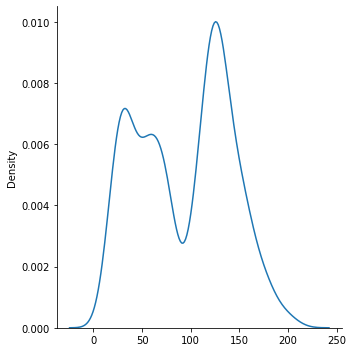

In [9]:
sns.displot(X_pos_li, kind="kde")

### Same for the non-alkaloid NMR (y = 0)

In [10]:
neg_idcs = y == 0

In [11]:
X_neg = X[neg_idcs]  # Steroids NMR

In [12]:
X_neg_li = []
for array in X_neg:
    for nmr in array:
        if nmr != -999.0:
            X_neg_li.append(nmr)

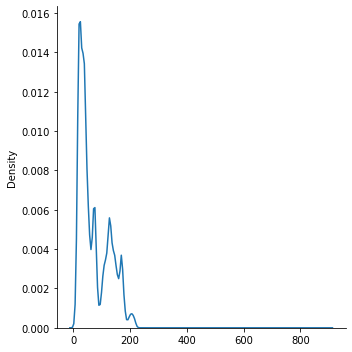

In [13]:
sns.displot(X_neg_li, kind="kde")

### Data imbalance:

In [14]:
round(len(X_pos) / len(X), 4) * 100

0.79

A highly imbalanced dataset